In [1]:
#MIE1624 Assignment 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive
#import all nessassery functions
drive.mount('/content/drive')
url = '/content/drive/My Drive/clean_kaggle_data_2024.csv'
df = pd.read_csv(url)
#read the data file

Mounted at /content/drive


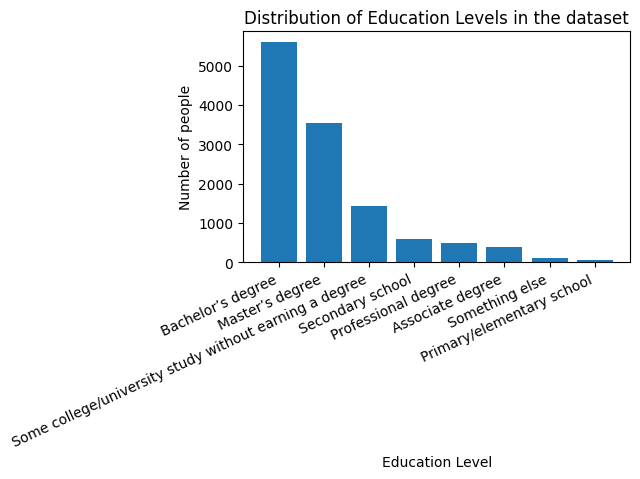

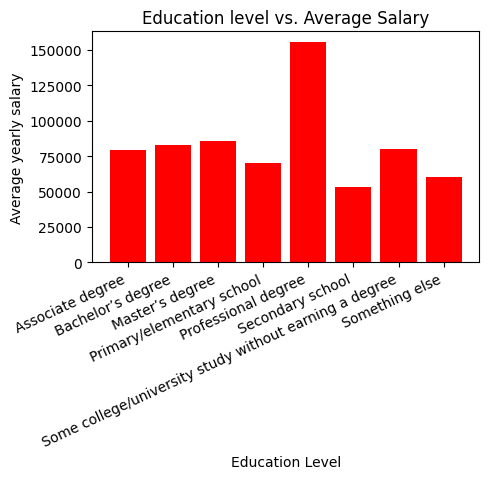

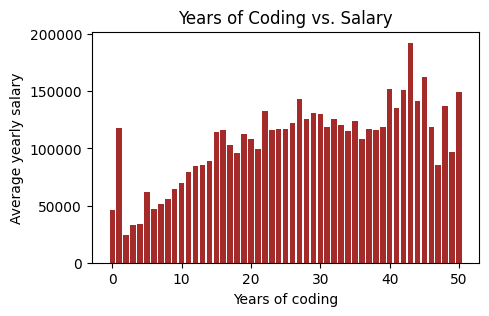

In [2]:
#Q1

education_counts = df['EdLevel'].value_counts()
#count the number of people for each education level
plt.figure(figsize=(5, 3))
plt.bar(education_counts.index, education_counts.values)
plt.title('Distribution of Education Levels in the dataset')
plt.xlabel('Education Level')
plt.ylabel('Number of people')
#plot the bar chart for each education levels' population
plt.xticks(rotation = 25, ha = 'right')
#rotate the label so no blocking each other, right alignment
plt.show()

average_salary_edlevel = df.groupby('EdLevel')['ConvertedCompYearly'].mean()
#calculate the average salary based on each education level
plt.figure(figsize=(5, 3))
plt.bar(average_salary_edlevel.index, average_salary_edlevel, color = 'red')
plt.title('Education level vs. Average Salary')
plt.xlabel('Education Level')
plt.ylabel('Average yearly salary')
#plot the graph using the index and the value
plt.xticks(rotation = 25, ha = 'right')
plt.show()

average_salary_yearscode = df.groupby('YearsCode')['ConvertedCompYearly'].mean()
#calculate the average salary based on each years of coding
plt.figure(figsize=(5, 3))
plt.bar(average_salary_yearscode.index, average_salary_yearscode, color = 'brown')
plt.title('Years of Coding vs. Salary')
plt.xlabel('Years of coding')
plt.ylabel('Average yearly salary')
plt.show()


Remote Mode Descriptive Statistics
count      4852.000000
mean      82883.765251
std       60326.925681
min         104.000000
25%       35241.250000
50%       72000.000000
75%      120000.000000
max      264264.000000
Name: ConvertedCompYearly, dtype: float64
In-person Mode Descriptive Statistics
count      1845.000000
mean      43218.509485
std       37394.958168
min         123.000000
25%       11963.000000
50%       32222.000000
75%       64544.000000
max      160000.000000
Name: ConvertedCompYearly, dtype: float64


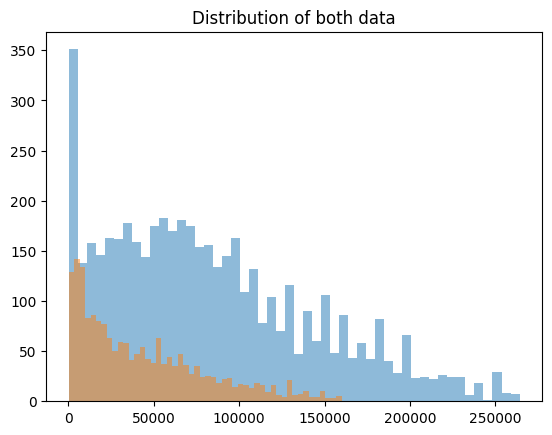

In [3]:
#Q2A

df_nonan = df.dropna(subset = ['RemoteWork','ConvertedCompYearly'])
#drop nan from the two columns

df_remote_withoutliers = df_nonan[df_nonan['RemoteWork'] == 'Remote']['ConvertedCompYearly']
df_inperson_withoutliers = df_nonan[df_nonan['RemoteWork'] == 'In-person']['ConvertedCompYearly']
#keep only remote and in-person two modes

def outlier_remover(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  return data[data.between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]
#define a function to find the value in the range without the outliers

df_remote = outlier_remover(df_remote_withoutliers)
df_inperson = outlier_remover(df_inperson_withoutliers)
#apply to both datasets to remove outliers

remote_stats = df_remote.describe()
inperson_stats = df_inperson.describe()
#get descriptive statistics for the two groups of in-person and remote

print('Remote Mode Descriptive Statistics')
print(remote_stats)
print('In-person Mode Descriptive Statistics')
print(inperson_stats)
#print all the statistics for two modes

plt.hist(df_remote, bins=50, alpha=0.5, label='remote data')
plt.hist(df_inperson, bins=50, alpha=0.5, label='inperson data')
plt.title('Distribution of both data')
plt.show()

In [4]:
#Q2B

inperson_salaries = df_inperson.to_numpy()
remote_salaries = df_remote.to_numpy()
#store the numbers in numpy forms for calculation


inperson_mean = inperson_salaries.mean()
remote_mean = remote_salaries.mean()
#calculate the means fo both columns
inperson_variance = inperson_salaries.var(ddof = 1)
remote_variance = remote_salaries.var(ddof = 1)
#calculate the variances fo both columns
n_inperson = len(inperson_salaries)
n_remote = len(remote_salaries)
#finding the size of sample
pooled_std = ((n_inperson - 1)*inperson_variance + (n_remote - 1)*remote_variance)/(n_inperson + n_remote - 2)
pooled_std = pooled_std ** 0.5
#using the formula to calculate pooled standard deviation
t_statistic = ()
if inperson_variance == remote_variance:
  t_statistic = (inperson_mean - remote_mean)/(pooled_std * ((1/n_inperson) + (1/n_remote))**0.5)
else:
  t_statistic = (inperson_mean - remote_mean)/((inperson_variance/n_inperson) + (remote_variance/n_remote))**0.5

print('manually calculated t statistic:',t_statistic)
#using the formula to caculate t statistics manually

t_test_result = stats.ttest_ind(inperson_salaries, remote_salaries, equal_var = False)
print('build-in function t statistic:',t_test_result.statistic, 'p-value:', t_test_result.pvalue)
#using the python buildin function to find the t statisti


manually calculated t statistic: -32.300517346148894
build-in function t statistic: -32.300517346148894 p-value: 3.6202400540501465e-209


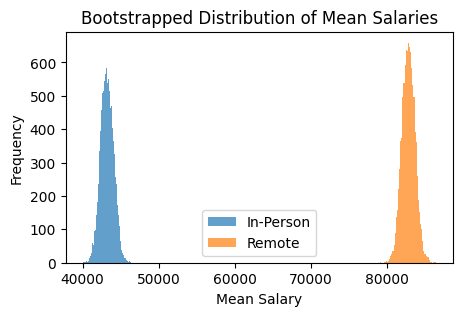

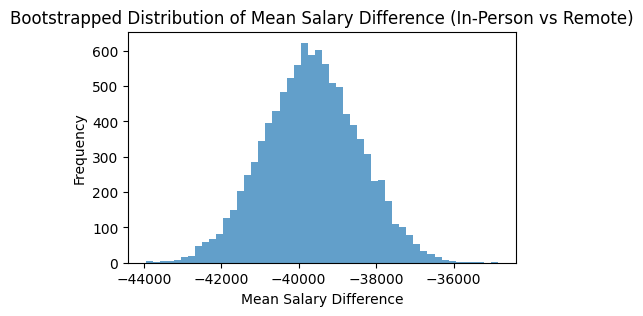

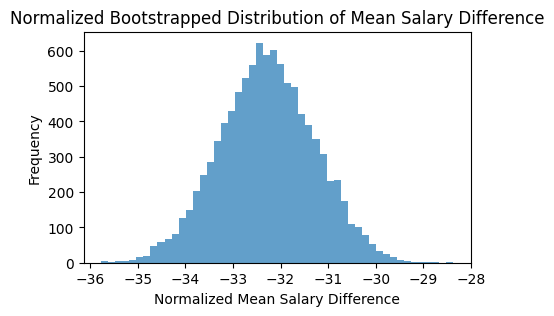

In [5]:
#Q2C

def bootstrap_mean(data, n_iterations = 10000):
    n_size = len(data)
    samples = np.random.choice(data, (n_iterations, n_size), replace = True)
    #randomly choose data from the input with replication 10000 times to form a (10000, n_size) array
    return np.mean(samples, axis = 1)
    #return the mean of each bootstrap sampling

inperson_bootstrapped_means = bootstrap_mean(inperson_salaries)
remote_bootstrapped_means = bootstrap_mean(remote_salaries)
#apply the function to the inperson salaries and remote salaries

plt.figure(figsize=(5, 3))
plt.hist(inperson_bootstrapped_means, bins = 50, alpha=0.7, label='In-Person')
plt.hist(remote_bootstrapped_means, bins = 50, alpha=0.7, label='Remote')
plt.title('Bootstrapped Distribution of Mean Salaries')
plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#plot the histogram of both inperson and remote data with more bins and some transparency in case of overlap

mean_difference_bootstrap = inperson_bootstrapped_means - remote_bootstrapped_means
#find the differences in different means
plt.figure(figsize=(5, 3))
plt.hist(mean_difference_bootstrap, bins=50, alpha=0.7)
plt.title('Bootstrapped Distribution of Mean Salary Difference (In-Person vs Remote)')
plt.xlabel('Mean Salary Difference')
plt.ylabel('Frequency')
plt.show()
#virsualize the Bootstrapped Distribution of Mean Salary Difference between inperson and remote

normalized_mean_diff = (mean_difference_bootstrap) / np.std(mean_difference_bootstrap)
#normalize the previous data with small scale
plt.figure(figsize=(5, 3))
plt.hist(normalized_mean_diff, bins=50, alpha=0.7)
plt.title('Normalized Bootstrapped Distribution of Mean Salary Difference')
plt.xlabel('Normalized Mean Salary Difference')
plt.ylabel('Frequency')
plt.show()
#normalize the previous data and plot the graph again


In [10]:
#Q2D

observed_mean_diff = np.abs(inperson_mean - remote_mean)
p_value = np.mean(np.abs(mean_difference_bootstrap) >= observed_mean_diff)
t_statistic = observed_mean_diff / np.std(mean_difference_bootstrap)
#using the manual function to do t test between observed mean and bootstrapped mean
print("t-statistic:", t_statistic, 'p-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
#check if p value is under the therashold and say observed difference and bootstrapped difference doesn't have too much difference


t-statistic: 32.28414971460782 p-value: 0.501
Fail to reject the null hypothesis


Bachelor’s degree Descriptive Statistics
count      5427.000000
mean      71958.281924
std       56435.211857
min         115.000000
25%       24243.000000
50%       60147.000000
75%      108000.000000
max      245000.000000
Name: ConvertedCompYearly, dtype: float64
Master’s degree Descriptive Statistics
count      3326.000000
mean      69625.830427
std       43855.209844
min         104.000000
25%       37861.000000
50%       64444.000000
75%       95592.000000
max      197627.000000
Name: ConvertedCompYearly, dtype: float64
Professional degree Descriptive Statistics
count       456.000000
mean      87121.328947
std       54015.721468
min         132.000000
25%       48789.500000
50%       76345.500000
75%      112777.000000
max      244585.000000
Name: ConvertedCompYearly, dtype: float64


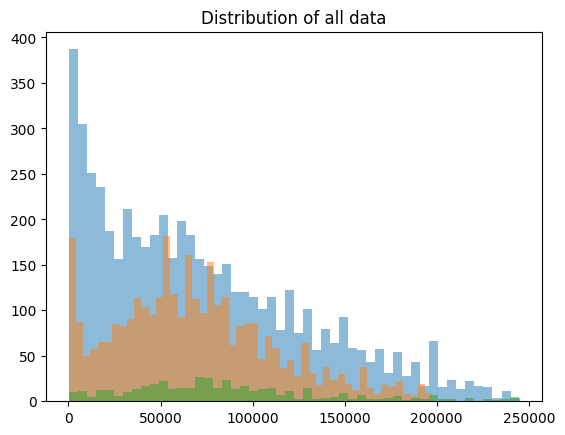

In [11]:
#Q3A

df_nonan_ed = df.dropna(subset=['EdLevel', 'ConvertedCompYearly'])
#drop nan from the dataset

df_bachelor = df_nonan_ed[df_nonan['EdLevel'] == 'Bachelor’s degree']['ConvertedCompYearly']
df_master = df_nonan[df_nonan_ed['EdLevel'] == 'Master’s degree']['ConvertedCompYearly']
df_professional = df_nonan[df_nonan_ed['EdLevel'] == 'Professional degree']['ConvertedCompYearly']
#keep only 3 columns in the data

df_bachelor_clean = outlier_remover(df_bachelor)
df_master_clean = outlier_remover(df_master)
df_professional_clean = outlier_remover(df_professional)
#remove the outliers with the function previously defined

bachelor_stats = df_bachelor_clean.describe()
master_stats = df_master_clean.describe()
professional_stats = df_professional_clean.describe()
#find the descriptive statistics

print('Bachelor’s degree Descriptive Statistics')
print(bachelor_stats)
print('Master’s degree Descriptive Statistics')
print(master_stats)
print('Professional degree Descriptive Statistics')
print(professional_stats)

plt.hist(df_bachelor_clean, bins=50, alpha=0.5, label='bachelor data')
plt.hist(df_master_clean, bins=50, alpha=0.5, label='master data')
plt.hist(df_professional_clean, bins=50, alpha=0.5, label='master data')
plt.title('Distribution of all data')
plt.show()
#check by looking at it if datas are normal

In [12]:
#Q3B

bachelor_salaries = df_bachelor_clean.to_numpy()
master_salaries = df_master_clean.to_numpy()
professional_salaries = df_professional_clean.to_numpy()
#store the numbers in numpy forms for calculation

anova_result = stats.f_oneway(bachelor_salaries, master_salaries, professional_salaries)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)
#use the build-in function to do the ANOVA to the salaries


ANOVA F-statistic: 22.61743359806553
ANOVA p-value: 1.5901093921488649e-10


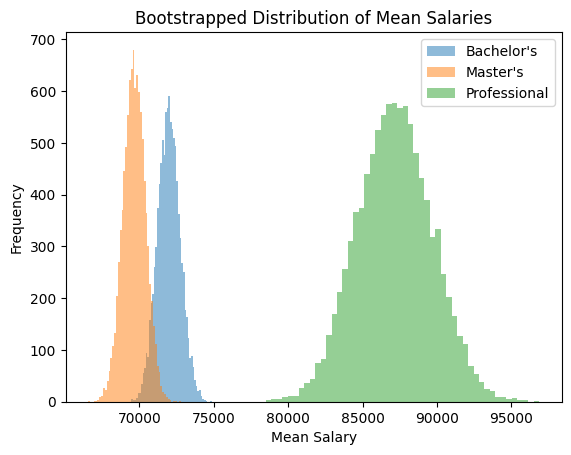

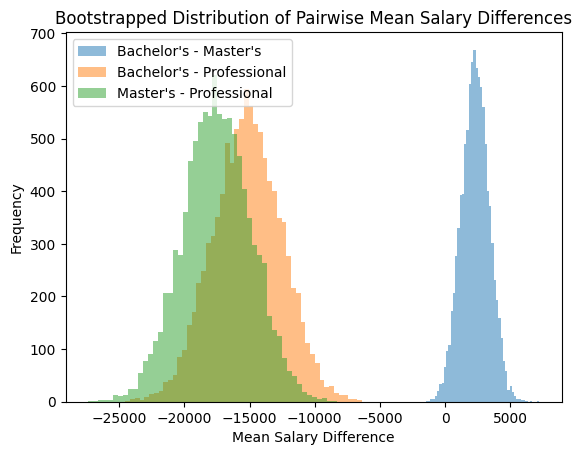

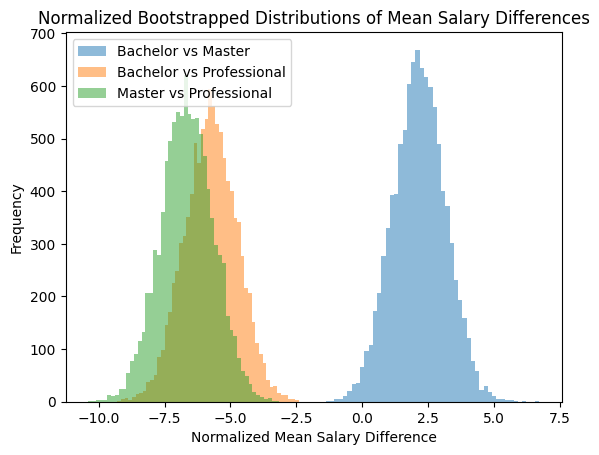

In [13]:
#Q3C

bachelor_bootstrap = bootstrap_mean(bachelor_salaries)
master_bootstrap = bootstrap_mean(master_salaries)
professional_bootstrap = bootstrap_mean(professional_salaries)
#use the bootstrap function defined before to bootstrap all arrays

plt.hist(bachelor_bootstrap, bins=50, alpha=0.5, label="Bachelor's")
plt.hist(master_bootstrap, bins=50, alpha=0.5, label="Master's")
plt.hist(professional_bootstrap, bins=50, alpha=0.5, label='Professional')
plt.title('Bootstrapped Distribution of Mean Salaries')
plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#virsualize the bootstrapped data

mean_diff_bachelor_master = bachelor_bootstrap - master_bootstrap
mean_diff_bachelor_professional = bachelor_bootstrap - professional_bootstrap
mean_diff_master_professional = master_bootstrap - professional_bootstrap
#find the differences between each two of them
plt.hist(mean_diff_bachelor_master, bins=50, alpha=0.5, label="Bachelor's - Master's")
plt.hist(mean_diff_bachelor_professional, bins=50, alpha=0.5, label="Bachelor's - Professional")
plt.hist(mean_diff_master_professional, bins=50, alpha=0.5, label="Master's - Professional")
plt.title('Bootstrapped Distribution of Pairwise Mean Salary Differences')
plt.xlabel('Mean Salary Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

mean_diff_bachelor_master_norm = (mean_diff_bachelor_master) / np.std(mean_diff_bachelor_master)
mean_diff_bachelor_professional_norm = (mean_diff_bachelor_professional) / np.std(mean_diff_bachelor_professional)
mean_diff_master_professional_norm = (mean_diff_master_professional) / np.std(mean_diff_master_professional)
#Didn't minus the mean when normalizing, so we can also observe the differences between each differences
plt.hist(mean_diff_bachelor_master_norm, bins=50, alpha=0.5, label="Bachelor vs Master")
plt.hist(mean_diff_bachelor_professional_norm, bins=50, alpha=0.5, label="Bachelor vs Professional")
plt.hist(mean_diff_master_professional_norm, bins=50, alpha=0.5, label="Master vs Professional")
plt.title('Normalized Bootstrapped Distributions of Mean Salary Differences')
plt.xlabel('Normalized Mean Salary Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [14]:
#Q3D

anova_bootstrap_result = stats.f_oneway(bachelor_bootstrap, master_bootstrap, professional_bootstrap)
print("ANOVA Results:")
print("F-statistic:", anova_bootstrap_result.statistic)
print("p-value:", anova_bootstrap_result.pvalue)
#apply the build-in function to bootstrapped distributions and find statistic

if anova_bootstrap_result.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
#check if p value is under the therashold

ANOVA Results:
F-statistic: 361146.7690674179
p-value: 0.0
Reject the null hypothesis
